## 台股外資 10 20 60 天 趨勢線 ＆ 月季線趨勢

Populating the interactive namespace from numpy and matplotlib
＝＝＝ 個股策略 ＝＝＝
個股策略：出現作多「買進」，就勇敢買進個股作多！！其餘為『觀望』
＝＝＝ 部位策略/週期策略 ＝＝＝
部位策略：控制多空加碼單部位！！
週期策略：
執行「長線」策略：國票執行30分取代05分,華南出場不執行『當天出場』
執行「短線」策略：國票執行05分
＝＝＝ 盤勢理解 ＝＝＝
波動度太差：非常不利長線出手！連續盤整超過3天就考慮部位縮小，特別是剛出現大震盪過後！！！
月季線反向：月上季下特別注意震盪容易大漲大跌。


,DATE,漲跌1,月線,季線,DIF,外資1,外資5,個股策略,加碼策略,部位策略,10日上,20日上,盤整,逆勢,大盤,個股
97,2019-07-23,2.73,1,-1,1,-0.51,56.48,作多「買進」,「不執行」加碼單,NaN,51,53,盤,-,多,-
98,2019-07-24,-11.50,1,-1,1,12.00,98.09,走低「觀望」,「不執行」加碼單,NaN,46,52,盤,-,多,-
99,2019-07-25,5.65,1,-1,-1,22.16,162.56,走低「觀望」,「不執行」加碼單,NaN,44,48,盤,-,-,-
100,2019-07-26,-49.43,1,-1,-1,-51.25,29.72,走低「觀望」,「不執行」加碼單,NaN,44,48,盤,-,-,-
101,2019-07-29,-6.25,-1,-1,-1,-43.94,-61.55,走低「觀望」,「執行空」加碼單,NaN,44,48,盤,-,空,-
102,2019-07-30,-54.83,-1,-1,-1,26.09,-34.95,走低「觀望」,「執行空」加碼單,NaN,40,41,盤,逆,空,-
103,2019-07-31,-7.09,1,-1,-1,-42.47,-89.41,走低「觀望」,「執行空」加碼單,NaN,40,40,盤,-,-,-
104,2019-08-01,-92.06,-1,-1,-1,-159.67,-278.75,走低「觀望」,「執行空」加碼單,NaN,32,31,-,逆,空,空
105,2019-08-02,-182.71,-1,-1,-1,-195.94,-422.68,走低「觀望」,「執行空」加碼單,NaN,13,17,順,-,空,空
106,2019-08-05,-125.63,-1,-1,-1,-155.12,-533.86,走低「觀望」,「執行空」加碼單,NaN,12,17,順,-,空,空


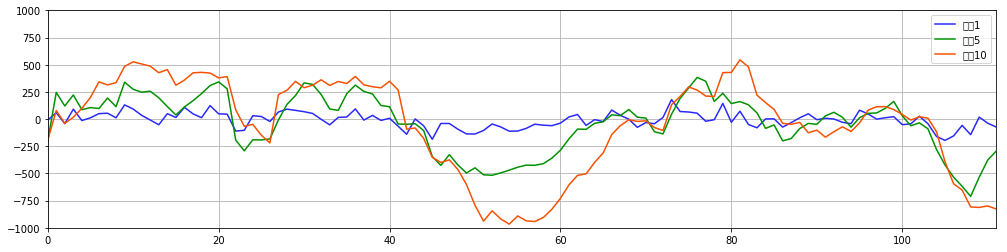

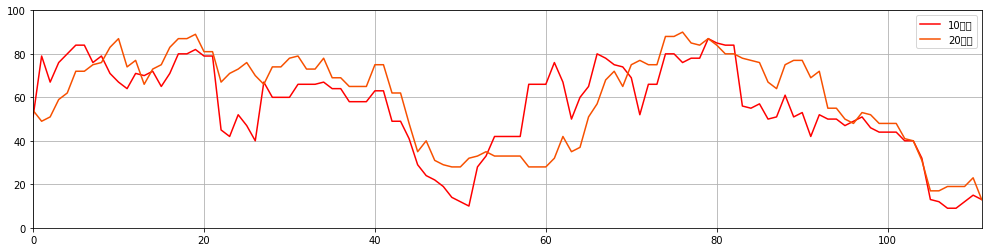

In [8]:
%pylab inline
from colorama import Fore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sheetName = 'tw100' # 台灣100
df = pd.read_excel('files/data.xlsx', sheetname=sheetName)
# 外資買賣超
df1 = df[['外資1','外資5','外資10']]
df1.plot(ylim=(-1000,1000),linestyle='-',kind='line',figsize=(17,4),color=['#2828FF','#009100','#F75000'],grid=True) 
# TW100趨勢
df2 = df[['10日上','20日上']]
df2.plot(ylim=(0,100),linestyle='-',kind='line',figsize=(17,4),color=['#ff0000','#F75000'],grid=True) 


# 盤整分析
conditions = [
    (df['盤整']  < 180),
    (df['盤整']  > 240)]
choices = ['盤', '順']
df['盤整'] = np.select(conditions, choices, '-')

# 逆勢分析
df['逆勢'] = np.where(df['逆勢'] > 40, '逆', '-')

# 大盤分析
conditions = [
    (df['大盤']  == 2),
    (df['大盤']  == -2)]
choices = ['多', '空']
df['大盤'] = np.select(conditions, choices, default='-')

# 個股分析
conditions = [
    (df['個股'] > 25),
    (df['個股'] < -25)]
choices = ['多', '空']
df['個股'] = np.select(conditions, choices, default='-')

# 選澤權
# 如果大盤&個股都是空 and 盤整為順勢 => Sell Put 出場
# 如果大盤&個股都是多 and 盤整為順勢 => Sell Call 出場
conditions = [
    (df['選擇權'] == 1),
    (df['選擇權'] == -1)]
choices = ['「多」SC注意風險', '「空」SP注意風險']
df['選擇權'] = np.select(conditions, choices, default='-')

print(Fore.RED+'＝＝＝ 個股策略 ＝＝＝')
print(Fore.BLACK+'個股策略：出現作多「買進」，就勇敢買進個股作多！！其餘為『觀望』')
print(Fore.RED+'＝＝＝ 部位策略/週期策略 ＝＝＝')
print(Fore.BLACK+'部位策略：控制多空加碼單部位！！')
print(Fore.BLACK+'週期策略：')
print(Fore.BLACK+'執行「長線」策略：國票執行30分取代05分,華南出場不執行『當天出場』')
print(Fore.BLACK+'執行「短線」策略：國票執行05分')
print(Fore.RED+'＝＝＝ 盤勢理解 ＝＝＝')
print(Fore.BLACK+'波動度太差：非常不利長線出手！連續盤整超過3天就考慮部位縮小，特別是剛出現大震盪過後！！！')
print(Fore.BLACK+'月季線反向：月上季下特別注意震盪容易大漲大跌。')
tails=15
df[['DATE','漲跌1','月線','季線','DIF','外資1','外資5','個股策略','加碼策略','部位策略','10日上','20日上','盤整','逆勢','大盤','個股']].tail(tails)


## 期貨-每月期望值統計資料

In [9]:
import pandas as pd
import numpy as np
from colorama import Fore

sheetName = 'all' # 交易資料 by 年份

dates=['2019-12','2019-11','2019-10','2019-9','2019-8','2019-7',\
       '2019-6','2019-5','2019-4','2019-3','2019-2','2019-1']

df = pd.read_excel('files/data.xlsx', sheetname=sheetName)

df['Date'] = df['成交時間'].dt.year.astype(str)+'-'+df['成交時間'].dt.month.astype(str)
df['Lot'] = df['口數']
df['Balance'] = df['平倉損益']

df = df[['Date','Lot','Balance']]

datas = []
for date in reversed(dates):
    df1 = df[df['Date']==date]
    if not df1.empty:
        obj = {}
        obj['年月份'] = date
        obj['虧損口數'] = df1[df1['Balance']<0]['Lot'].sum()
        obj['獲利口數'] = df1[df1['Balance']>=0]['Lot'].sum()
        obj['總口數'] = df1['Lot'].sum()
        obj['勝率%'] = str(round((obj['獲利口數'] / obj['總口數'])*100, 1))+'%'
        obj['總虧損'] = df1[df1['Balance']<0]['Balance'].sum()
        obj['總獲利'] = df1[df1['Balance']>=0]['Balance'].sum()
        obj['淨利'] = df1['Balance'].sum()
        obj['期望報酬'] = round((obj['淨利'] / obj['總口數']))
        obj['平均虧損'] = round(obj['總虧損'] / obj['虧損口數'],0)
        obj['平均獲利'] = round(obj['總獲利'] / obj['獲利口數'],0)
        obj['盈虧比'] = str(round((obj['平均獲利'] / obj['平均虧損'] * -1),2))+':1'
        obj['最大虧損'] = df1['Balance'].min()
        obj['最大獲利'] = df1['Balance'].max()
        obj['品質A'] = round((obj['平均獲利'] / obj['平均虧損'] * -1) - (obj['虧損口數'] / obj['獲利口數']),2)
        obj['品質B'] = str(round(100*((obj['獲利口數'] / obj['總口數']) * (obj['平均獲利'] / obj['平均虧損'] * -1) - (1 - (obj['獲利口數'] / obj['總口數']))),1))+'%'
         
        # 計算淨利成長率   
        if(len(datas) != 0):
            total = 0 
            for month in range(0, len(datas)):
                total = total + datas[month]['淨利']
            obj['淨成長率'] = str(round((obj['淨利'] / total)*100, 1))+'%'
            
        datas.append(obj)

# Total        
obj ={}
obj['年月份'] = 'Total'
obj['虧損口數'] = df[df['Balance']<0]['Lot'].sum()
obj['獲利口數'] = df[df['Balance']>=0]['Lot'].sum()
obj['總口數'] = df['Lot'].sum()
obj['勝率%'] = str(round((obj['獲利口數'] / obj['總口數'])*100, 1))+'%'
obj['總虧損'] = df[df['Balance']<0]['Balance'].sum()
obj['總獲利'] = df[df['Balance']>=0]['Balance'].sum()
obj['淨利'] = df['Balance'].sum()
obj['期望報酬'] = round((obj['淨利'] / obj['總口數']))
obj['平均虧損'] = round(obj['總虧損'] / obj['虧損口數'],0)
obj['平均獲利'] = round(obj['總獲利'] / obj['獲利口數'],0)
obj['盈虧比'] = str(round((obj['平均獲利'] / obj['平均虧損'] * -1),2))+':1'
obj['最大虧損'] = df['Balance'].min()
obj['最大獲利'] = df['Balance'].max()
obj['品質A'] = round((obj['平均獲利'] / obj['平均虧損'] * -1) - (obj['虧損口數'] / obj['獲利口數']),2)
obj['品質B'] = str(round(100*((obj['獲利口數'] / obj['總口數']) * (obj['平均獲利'] / obj['平均虧損'] * -1) - (1 - (obj['獲利口數'] / obj['總口數']))),1))+'%'
datas.insert(0,obj)
       
df = pd.DataFrame(datas).sort_index(ascending=False)

print(Fore.RED+'交易聖經：接受最大逆境; 市場該做的事就是讓大多數的人失望！永遠不要覺得好像容易了...')

#datas
df[['年月份','虧損口數','獲利口數','總口數','勝率%','總虧損','總獲利','淨利','淨成長率','期望報酬','平均虧損','平均獲利','盈虧比','最大虧損','最大獲利','品質A','品質B']]

# 交易系統關鍵：正期望值 * 交易機會 * 部位大小(破產風險)
# 交易品質A：大於1表示完美; 1~0.75表示不錯; 0.75~0.5表示可用稍不足; 低於0.5表示其實不及格
# 交易品質B：勝率50%+盈虧比3:1表示100%期望值(完美); 勝率50%+盈虧比2:1表示50%期望值; 品質至少要維持33%以上
# 交易目標：維持勝率43%左右; 盈虧比2:1以上;

交易聖經：接受最大逆境; 市場該做的事就是讓大多數的人失望！永遠不要覺得好像容易了...


,年月份,虧損口數,獲利口數,總口數,勝率%,總虧損,總獲利,淨利,淨成長率,期望報酬,平均虧損,平均獲利,盈虧比,最大虧損,最大獲利,品質A,品質B
7,2019-7,46,8,54,14.8%,-240242,172345,-67897,-16.7%,-1257.0,-5223.0,21543.0,4.12:1,-23516,76449,-1.63,-24.1%
6,2019-6,19,20,39,51.3%,-163543,359091,195548,92.5%,5014.0,-8608.0,17955.0,2.09:1,-25510,91290,1.14,58.2%
5,2019-5,29,16,45,35.6%,-294095,437716,143621,211.7%,3192.0,-10141.0,27357.0,2.7:1,-75122,105284,0.89,31.5%
4,2019-4,10,6,16,37.5%,-128287,79655,-48632,-41.8%,-3040.0,-12829.0,13276.0,1.03:1,-45055,26045,-0.63,-23.7%
3,2019-3,9,10,19,52.6%,-86381,90258,3877,3.4%,204.0,-9598.0,9026.0,0.94:1,-16356,22644,0.04,2.1%
2,2019-2,2,8,10,80.0%,-11902,274192,262290,-175.2%,26229.0,-5951.0,34274.0,5.76:1,-7550,77944,5.51,440.7%
1,2019-1,31,10,41,24.4%,-251390,101705,-149685,NaN,-3651.0,-8109.0,10170.0,1.25:1,-18549,26449,-1.85,-45.0%
0,Total,146,78,224,34.8%,-1175840,1514962,339122,NaN,1514.0,-8054.0,19423.0,2.41:1,-75122,105284,0.54,18.8%


## 部位規模控制 - 固定百分率
#### 固定百分率 - 專業交易員最常用
#### 公式：合約口數 = (固定百分率 * 帳戶餘額) / 個別交易風險
#### 個別交易風險: 近三個月平均虧損的平均

In [10]:
positionSize = 0
固定百分率 = 0.05 # 5.0%, 帳戶規模越大要降低風險最佳1-2%
帳戶餘額 = obj['淨利']
for i in range(8,0,-1):
    個別交易風險 = abs((datas[-2]['平均虧損'] + datas[-3]['平均虧損'] + datas[-4]['平均虧損']) / 3) * i
    if(positionSize == 0 and round((固定百分率 * 帳戶餘額) / 個別交易風險,2) > 1):
        positionSize = i
    print('Lot:',i, '部位門檻:',round((固定百分率 * 帳戶餘額) / 個別交易風險,2))
    
print('計算可交易部位：',positionSize)

Lot: 8 部位門檻: 0.2
Lot: 7 部位門檻: 0.23
Lot: 6 部位門檻: 0.27
Lot: 5 部位門檻: 0.32
Lot: 4 部位門檻: 0.4
Lot: 3 部位門檻: 0.54
Lot: 2 部位門檻: 0.81
Lot: 1 部位門檻: 1.61
計算可交易部位： 1


## 破產風險 ＆ 期望報酬(R)
#### 破產風險 = 虧損機率 ** ( ( 淨利  x  0.1 ) / ( 平均虧損 x 部位規模 ) ) ---- 破產定義：淨利減少1成就算破產!! XD
#### 單筆虧損(%) 建議要低於 2%, 1.5%更佳; 長期甚至低於1%
#### 破產風險(%) 建議要降為 0%

In [11]:
print('部位規模    : '+str(positionSize))  # 部位規模
print('目前淨利    : '+str('${:,.0f}'.format(obj['淨利'])))
print('單筆虧損(%) : '+str(round(abs((obj['平均虧損'] * positionSize) / obj['淨利']),3) * 100)+'%')
print('平均虧損    : '+str(round(obj['總虧損'] / obj['虧損口數'],0)))
print('破產風險    : '+str(round((obj['虧損口數'] / obj['總口數']) ** abs((obj['淨利']*0.1) / (obj['平均虧損'] * (positionSize))) * 100, 2))+'%')
print('期望報酬(R) : '+str(round((obj['期望報酬'] / obj['平均虧損']) * -1,2))+'R')
print('實現報酬(R) : '+str(round((obj['期望報酬'] / obj['平均虧損']) * -1,2) * obj['總口數'] )+'R')
print('=========================')
print('淨利七成    : '+str(round((obj['虧損口數'] / obj['總口數']) ** abs((obj['淨利']*0.3) / (obj['平均虧損'] * (positionSize))) * 100, 2))+'%')
print('淨利減半    : '+str(round((obj['虧損口數'] / obj['總口數']) ** abs((obj['淨利']*0.5) / (obj['平均虧損'] * (positionSize))) * 100, 2))+'%')
base = 0.1         # 淨成長率
target = 5000000  # 淨目標 500w to 1,000w
profit = obj['淨利']
for i in range(1,50):
    profit = profit * (1 + base)
    if(profit > target):
        print('淨利目標    : '+str('${:,.0f}'.format(target)))
        print('預估期數    : '+str(i))
        break

部位規模    : 1
目前淨利    : $339,122
單筆虧損(%) : 2.4%
平均虧損    : -8054.0
破產風險    : 16.49%
期望報酬(R) : 0.19R
實現報酬(R) : 42.56R
淨利七成    : 0.45%
淨利減半    : 0.01%
淨利目標    : $5,000,000
預估期數    : 29


## 每月交易統計紀錄

In [12]:
import pandas as pd
import numpy as np


df = pd.read_excel('files/data.xlsx', sheetname=sheetName)

df['Date'] = df['成交時間'].dt.year.astype(str)+'-'+df['成交時間'].dt.month.astype(str)
df['Lot'] = df['口數']
df['Balance'] = df['平倉損益']

df = df[['Date','Lot','Balance']]

datas = []
for date in reversed(dates):
    df1 = df[df['Date']==date]
    if not df1.empty:
        obj = {}
        obj['年月份'] = date
        obj['-270~150'] = df1[(df1['Balance']/df1['Lot'] >= -54000) & (df1['Balance']/df1['Lot'] < -30000)]['Lot'].sum()
        obj['-150~120'] = df1[(df1['Balance']/df1['Lot'] >= -30000) & (df1['Balance']/df1['Lot'] < -24000)]['Lot'].sum()
        obj['-120~90'] = df1[(df1['Balance']/df1['Lot'] >= -24000) & (df1['Balance']/df1['Lot'] < -18000)]['Lot'].sum()
        obj['-90~60'] = df1[(df1['Balance']/df1['Lot'] >= -18000) & (df1['Balance']/df1['Lot'] < -12000)]['Lot'].sum()
        obj['-60~30'] = df1[(df1['Balance']/df1['Lot'] >= -12000) & (df1['Balance']/df1['Lot'] < -6000)]['Lot'].sum()
        obj['-30~0'] = df1[(df1['Balance']/df1['Lot'] >= -6000) & (df1['Balance']/df1['Lot'] < 0)]['Lot'].sum()
        obj['0~30'] = df1[(df1['Balance']/df1['Lot'] >= 0) & (df1['Balance']/df1['Lot'] < 6000)]['Lot'].sum()
        obj['30~60'] = df1[(df1['Balance']/df1['Lot'] >= 6000) & (df1['Balance']/df1['Lot'] < 12000)]['Lot'].sum()
        obj['60~90'] = df1[(df1['Balance']/df1['Lot'] >= 12000) & (df1['Balance']/df1['Lot'] < 18000)]['Lot'].sum()
        obj['90~120'] = df1[(df1['Balance']/df1['Lot'] >= 18000) & (df1['Balance']/df1['Lot'] < 24000)]['Lot'].sum()
        obj['120~150'] = df1[(df1['Balance']/df1['Lot'] >= 24000) & (df1['Balance']/df1['Lot'] < 30000)]['Lot'].sum()
        obj['150~180'] = df1[(df1['Balance']/df1['Lot'] >= 30000) & (df1['Balance']/df1['Lot'] < 36000)]['Lot'].sum()
        obj['180~210'] = df1[(df1['Balance']/df1['Lot'] >= 36000) & (df1['Balance']/df1['Lot'] < 42000)]['Lot'].sum()
        obj['210~240'] = df1[(df1['Balance']/df1['Lot'] >= 42000) & (df1['Balance']/df1['Lot'] < 48000)]['Lot'].sum()
        obj['240~270'] = df1[(df1['Balance']/df1['Lot'] >= 48000) & (df1['Balance']/df1['Lot'] < 54000)]['Lot'].sum()
        obj['270~800'] = df1[(df1['Balance']/df1['Lot'] >= 54000) & (df1['Balance']/df1['Lot'] < 160000)]['Lot'].sum()
        datas.append(obj)

# Lot Sum
obj = {}
obj['年月份'] = 'Total'
obj['-270~150'] = df[(df['Balance']/df['Lot'] >= -54000) & (df['Balance']/df['Lot'] < -30000)]['Lot'].sum()
obj['-150~120'] = df[(df['Balance']/df['Lot'] >= -30000) & (df['Balance']/df['Lot'] < -24000)]['Lot'].sum()
obj['-120~90'] = df[(df['Balance']/df['Lot'] >= -24000) & (df['Balance']/df['Lot'] < -18000)]['Lot'].sum()
obj['-90~60'] = df[(df['Balance']/df['Lot'] >= -18000) & (df['Balance']/df['Lot'] < -12000)]['Lot'].sum()
obj['-60~30'] = df[(df['Balance']/df['Lot'] >= -12000) & (df['Balance']/df['Lot'] < -6000)]['Lot'].sum()
obj['-30~0'] = df[(df['Balance']/df['Lot'] >= -6000) & (df['Balance']/df['Lot'] < 0)]['Lot'].sum()
obj['0~30'] = df[(df['Balance']/df['Lot'] >= 0) & (df['Balance']/df['Lot'] < 6000)]['Lot'].sum()
obj['30~60'] = df[(df['Balance']/df['Lot'] >= 6000) & (df['Balance']/df['Lot'] < 12000)]['Lot'].sum()
obj['60~90'] = df[(df['Balance']/df['Lot'] >= 12000) & (df['Balance']/df['Lot'] < 18000)]['Lot'].sum()
obj['90~120'] = df[(df['Balance']/df['Lot'] >= 18000) & (df['Balance']/df['Lot'] < 24000)]['Lot'].sum()
obj['120~150'] = df[(df['Balance']/df['Lot'] >= 24000) & (df['Balance']/df['Lot'] < 30000)]['Lot'].sum()
obj['150~180'] = df[(df['Balance']/df['Lot'] >= 30000) & (df['Balance']/df['Lot'] < 36000)]['Lot'].sum()
obj['180~210'] = df[(df['Balance']/df['Lot'] >= 36000) & (df['Balance']/df['Lot'] < 42000)]['Lot'].sum()
obj['210~240'] = df[(df['Balance']/df['Lot'] >= 42000) & (df['Balance']/df['Lot'] < 48000)]['Lot'].sum()
obj['240~270'] = df[(df['Balance']/df['Lot'] >= 48000) & (df['Balance']/df['Lot'] < 54000)]['Lot'].sum()
obj['270~800'] = df[(df['Balance']/df['Lot'] >= 54000) & (df['Balance']/df['Lot'] < 160000)]['Lot'].sum()
datas.insert(0,obj)

# Balance Sum
obj = {}
obj['年月份'] = '損益金額'
obj['-270~150'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= -54000) & (df['Balance']/df['Lot'] < -30000)]['Balance'].sum()/1000)+'K'
obj['-150~120'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= -30000) & (df['Balance']/df['Lot'] < -24000)]['Balance'].sum()/1000)+'K'
obj['-120~90'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= -24000) & (df['Balance']/df['Lot'] < -18000)]['Balance'].sum()/1000)+'K'
obj['-90~60'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= -18000) & (df['Balance']/df['Lot'] < -12000)]['Balance'].sum()/1000)+'K'
obj['-60~30'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= -12000) & (df['Balance']/df['Lot'] < -6000)]['Balance'].sum()/1000)+'K'
obj['-30~0'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= -6000) & (df['Balance']/df['Lot'] < 0)]['Balance'].sum()/1000)+'K'
obj['0~30'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 0) & (df['Balance']/df['Lot'] < 6000)]['Balance'].sum()/1000)+'K'
obj['30~60'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 6000) & (df['Balance']/df['Lot'] < 12000)]['Balance'].sum()/1000)+'K'
obj['60~90'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 12000) & (df['Balance']/df['Lot'] < 18000)]['Balance'].sum()/1000)+'K'
obj['90~120'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 18000) & (df['Balance']/df['Lot'] < 24000)]['Balance'].sum()/1000)+'K'
obj['120~150'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 24000) & (df['Balance']/df['Lot'] < 30000)]['Balance'].sum()/1000)+'K'
obj['150~180'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 30000) & (df['Balance']/df['Lot'] < 36000)]['Balance'].sum()/1000)+'K'
obj['180~210'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 36000) & (df['Balance']/df['Lot'] < 42000)]['Balance'].sum()/1000)+'K'
obj['210~240'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 42000) & (df['Balance']/df['Lot'] < 48000)]['Balance'].sum()/1000)+'K'
obj['240~270'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 48000) & (df['Balance']/df['Lot'] < 54000)]['Balance'].sum()/1000)+'K'
obj['270~800'] = '{:.0f}'.format(df[(df['Balance']/df['Lot'] >= 54000) & (df['Balance']/df['Lot'] < 160000)]['Balance'].sum()/1000)+'K'

datas.insert(0,obj)

        
df = pd.DataFrame(datas).sort_index(ascending=False)
df = df[['年月份','-270~150','-150~120','-120~90','-90~60','-60~30','-30~0','0~30','30~60','60~90','90~120','120~150', \
         '150~180','180~210','210~240','240~270','270~800']]

df

,年月份,-270~150,-150~120,-120~90,-90~60,-60~30,-30~0,0~30,30~60,60~90,90~120,120~150,150~180,180~210,210~240,240~270,270~800
8,2019-7,0,0,0,0,16,30,3,2,0,0,0,2,0,0,0,1
7,2019-6,0,0,0,6,6,7,10,2,0,2,0,1,0,4,1,0
6,2019-5,3,0,1,1,12,12,0,5,0,1,1,4,2,1,2,0
5,2019-4,1,1,0,1,3,4,3,0,0,1,2,0,0,0,0,0
4,2019-3,0,0,0,3,4,2,3,4,1,2,0,0,0,0,0,0
3,2019-2,0,0,0,0,1,1,0,0,1,4,0,1,0,0,0,2
2,2019-1,0,0,3,3,13,12,3,4,2,0,1,0,0,0,0,0
1,Total,4,1,4,14,55,68,22,17,4,10,4,8,2,5,3,3
0,損益金額,-156K,-25K,-74K,-202K,-463K,-255K,61K,134K,63K,220K,105K,260K,82K,221K,155K,215K


## 交易紀錄統計長條圖

Populating the interactive namespace from numpy and matplotlib


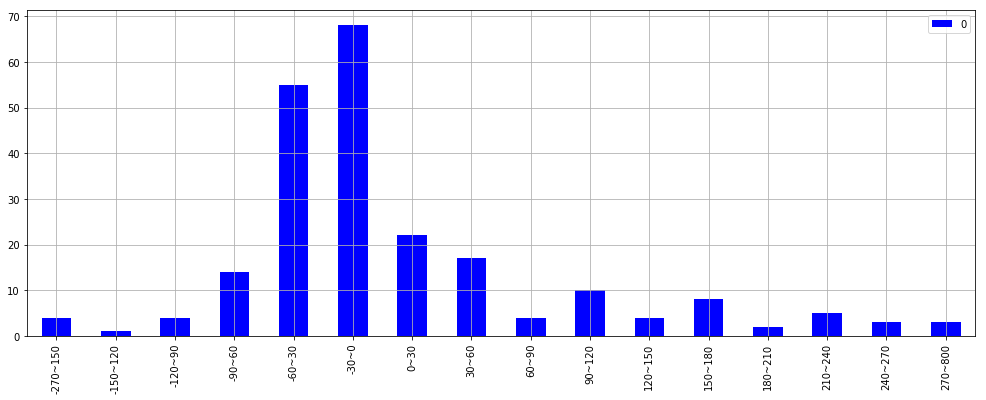

In [13]:
%pylab inline

import pandas as pd
import numpy as np

df = pd.read_excel('files/data.xlsx', sheetname=sheetName)

df['Date'] = df['成交時間'].dt.year.astype(str)+df['成交時間'].dt.month.astype(str)
df['Lot'] = df['口數']
df['Balance'] = df['平倉損益']

df = df[['Date','Lot','Balance']]

obj = {}
obj['-270~150'] = df[(df['Balance']/df['Lot'] >= -54000) & (df['Balance']/df['Lot'] < -30000)]['Lot'].sum()
obj['-150~120'] = df[(df['Balance']/df['Lot'] >= -30000) & (df['Balance']/df['Lot'] < -24000)]['Lot'].sum()
obj['-120~90'] = df[(df['Balance']/df['Lot'] >= -24000) & (df['Balance']/df['Lot'] < -18000)]['Lot'].sum()
obj['-90~60'] = df[(df['Balance']/df['Lot'] >= -18000) & (df['Balance']/df['Lot'] < -12000)]['Lot'].sum()
obj['-60~30'] = df[(df['Balance']/df['Lot'] >= -12000) & (df['Balance']/df['Lot'] < -6000)]['Lot'].sum()
obj['-30~0'] = df[(df['Balance']/df['Lot'] >= -6000) & (df['Balance']/df['Lot'] < 0)]['Lot'].sum()
obj['0~30'] = df[(df['Balance']/df['Lot'] >= 0) & (df['Balance']/df['Lot'] < 6000)]['Lot'].sum()
obj['30~60'] = df[(df['Balance']/df['Lot'] >= 6000) & (df['Balance']/df['Lot'] < 12000)]['Lot'].sum()
obj['60~90'] = df[(df['Balance']/df['Lot'] >= 12000) & (df['Balance']/df['Lot'] < 18000)]['Lot'].sum()
obj['90~120'] = df[(df['Balance']/df['Lot'] >= 18000) & (df['Balance']/df['Lot'] < 24000)]['Lot'].sum()
obj['120~150'] = df[(df['Balance']/df['Lot'] >= 24000) & (df['Balance']/df['Lot'] < 30000)]['Lot'].sum()
obj['150~180'] = df[(df['Balance']/df['Lot'] >= 30000) & (df['Balance']/df['Lot'] < 36000)]['Lot'].sum()
obj['180~210'] = df[(df['Balance']/df['Lot'] >= 36000) & (df['Balance']/df['Lot'] < 42000)]['Lot'].sum()
obj['210~240'] = df[(df['Balance']/df['Lot'] >= 42000) & (df['Balance']/df['Lot'] < 48000)]['Lot'].sum()
obj['240~270'] = df[(df['Balance']/df['Lot'] >= 48000) & (df['Balance']/df['Lot'] < 54000)]['Lot'].sum()
obj['270~800'] = df[(df['Balance']/df['Lot'] >= 54000) & (df['Balance']/df['Lot'] < 160000)]['Lot'].sum()

df = pd.DataFrame(obj, index=[0])
df = df[['-270~150','-150~120','-120~90','-90~60','-60~30','-30~0','0~30','30~60','60~90','90~120', \
         '120~150','150~180','180~210','210~240','240~270','270~800']]

df = pd.DataFrame(df.stack()[0])
df.plot(kind='bar', figsize=(17,6),color='Blue',grid=True) # DarkGreen, DarkOrange, DarkBlue, Gray

## 平倉損益淨利累積曲線圖

Populating the interactive namespace from numpy and matplotlib


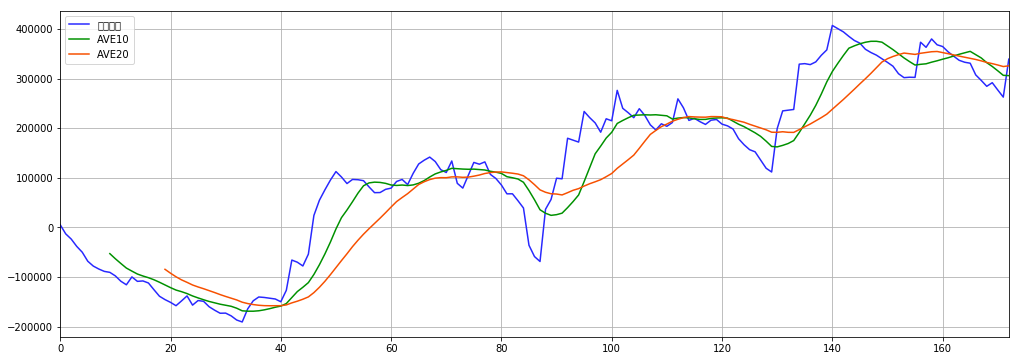

In [14]:
%pylab inline

import pandas as pd
import numpy as np

df = pd.read_excel('files/data.xlsx', sheetname=sheetName)
df = pd.DataFrame(df['平倉損益'].cumsum())

df['AVE10'] =  df['平倉損益'].rolling(window = 10).mean()
df['AVE20'] =  df['平倉損益'].rolling(window = 20).mean()
df
df.plot(linestyle='-',kind='line',figsize=(17,6),color=['#2828FF','#009100','#F75000'],grid=True) 

# End!!